# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


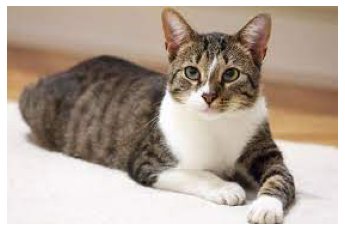

In [5]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg')
plt.imshow(img), plt.axis('off');

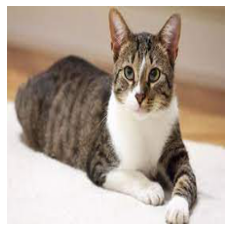

In [6]:
img = Image.open('cat.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

- 이미지 예측

In [7]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.58085394),
   ('n02123045', 'tabby', 0.33690035),
   ('n02123159', 'tiger_cat', 0.080482274),
   ('n02127052', 'lynx', 0.00047275427),
   ('n04040759', 'radiator', 0.00023365744)]])

In [8]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.58085394)

- 이미지를 224 x 224 사이즈로 자르기

In [9]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

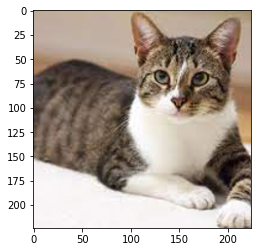

In [10]:
img = Image.open('cat.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [11]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.57441676)